In [1]:
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from tqdm.auto import tqdm
import copy
import cv2
from google.colab.patches import cv2_imshow
from pathlib import Path
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Load and Display Data

In [3]:
# Load Data
X_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
X_test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
count_train = X_train['6'].value_counts(sort=True)
count_test = X_test['7'].value_counts(sort=True)

Text(0.5, 1.0, 'Number of Test Samples')

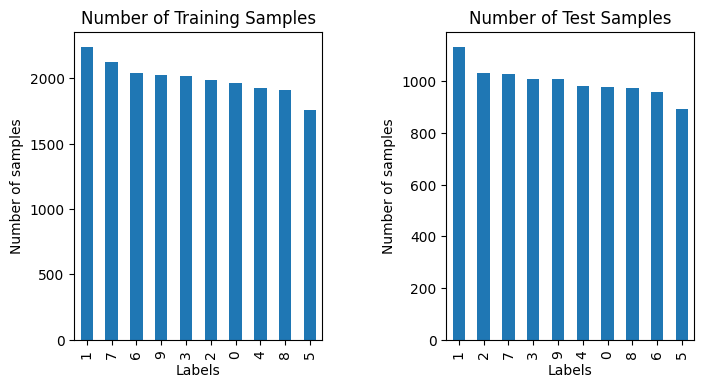

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
plt.subplots_adjust(wspace=0.5)
count_train.plot(kind='bar',ax=axes[0], xlabel='Labels',ylabel='Number of samples')
axes[0].set_title('Number of Training Samples')
count_test.plot(kind='bar',ax=axes[1],xlabel='Labels',ylabel='Number of samples')
axes[1].set_title('Number of Test Samples')

In [ ]:
print(X_test.columns.to_list())

['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48', '0.49', '0.50', '0.51', '0.52', '0.53', '0.54', '0.55', '0.56', '0.57', '0.58', '0.59', '0.60', '0.61', '0.62', '0.63', '0.64', '0.65', '0.66', '0.67', '0.68', '0.69', '0.70', '0.71', '0.72', '0.73', '0.74', '0.75', '0.76', '0.77', '0.78', '0.79', '0.80', '0.81', '0.82', '0.83', '0.84', '0.85', '0.86', '0.87', '0.88', '0.89', '0.90', '0.91', '0.92', '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '0.100', '0.101', '0.102', '0.103', '0.104', '0.105', '0.106', '0.107', '0.108', '0.109', '0.110', '0.111', '0.112', '0.113', '0.114', '0.115', '0.116', '0.117', '0.118', '0.119', '0.120', '0.121', '0.122',

In [ ]:
X_test['7']

,7
0,2
1,1
2,0
3,4
4,1
...,...
9994,2
9995,3
9996,4
9997,5


In [4]:
# Seperate the labels to y variabels
y_train = X_train.pop('6')
y_test = X_test.pop('7')

In [5]:
# normalize to 0-1
X_train = X_train.to_numpy() / 255.0
X_test = X_test.to_numpy() / 255.0
y_train = y_train.to_numpy()
y_test =  y_test.to_numpy()

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19999, 784), (9999, 784), (19999,), (9999,))

In [ ]:
X_train_img = X_train.reshape(-1,28,28)
X_test_img = X_test.reshape(-1,28,28)

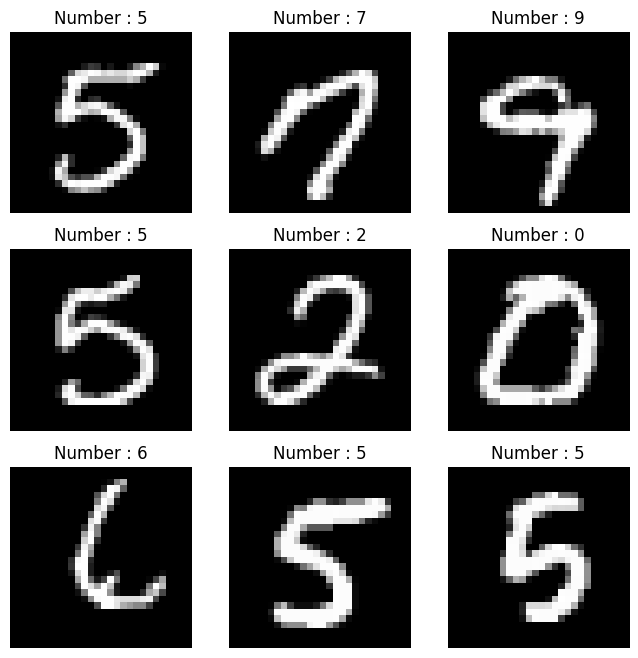

In [ ]:
row = 3
col = 3
fig, axes = plt.subplots(row,col,figsize=(8,8))
axes = axes.flatten()
for i in range(row*col):
  image = X_train_img[i]
  title = y_train[i]
  axes[i].imshow(image, cmap='gray')
  axes[i].set_title(f'Number : {title}')
  axes[i].axis('off')

In [19]:
def conf_matr(y_true, y_pred, labels):
  cm = confusion_matrix(y_true,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

## Benchmarks

### Support Vector Machines(SVM)

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

68.19223737716675


In [ ]:
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96999699969997
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1027
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97      9999
   macro avg       0.97      0.97      0.97      9999
weighted avg       0.97      0.97      0.97      9999



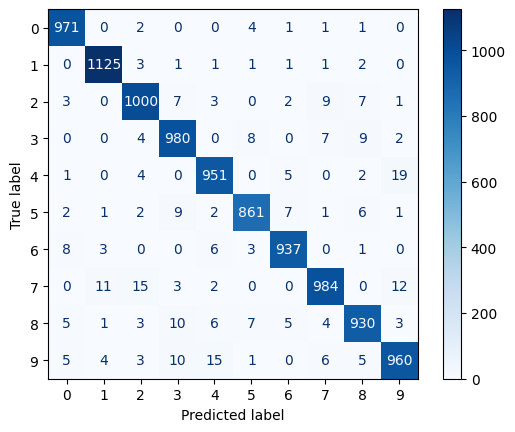

In [ ]:
conf_matr(y_test, y_pred, labels=svm_model.classes_)

### K-nearest neighboor (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

0.26530933380126953


In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9594959495949595
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.95      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.94      0.95       982
           5       0.97      0.95      0.96       892
           6       0.97      0.98      0.97       958
           7       0.95      0.96      0.95      1027
           8       0.98      0.92      0.95       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.96      9999
   macro avg       0.96      0.96      0.96      9999
weighted avg       0.96      0.96      0.96      9999



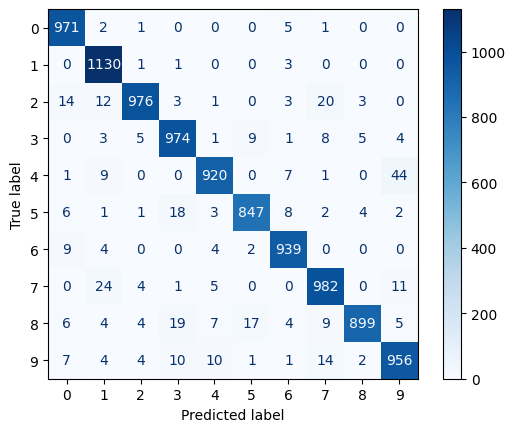

In [ ]:
conf_matr(y_test, y_pred, labels=knn.classes_)

### Set up for device agnostic code

In [6]:
# Make device agostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
# Convert to tensors with dtype float32
X_train = torch.from_numpy(X_train.astype(np.float32)).to(device)
y_train = torch.from_numpy(y_train).to(device)
X_test = torch.from_numpy(X_test.astype(np.float32)).to(device)
y_test = torch.from_numpy(y_test).to(device)

### Neural Network

In [8]:
def stop_train(patience, patience_param, acc_now, acc_before):
  if patience == 0:
    return True, patience, acc_before
  else:
    if acc_before >= acc_now:
      patience -= 1
    else:
      patience = patience_param
    acc_before = acc_now
    return False, patience, acc_before

In [9]:
def get_best_model(acc_now, epoch_now, model, best_acc, best_param, best_epoch):
  if acc_now > best_acc:
    best_acc = acc_now
    best_param = copy.deepcopy(model.state_dict())
    best_epoch = epoch_now
    print(f'Updates the best model, with test accuracy of {best_acc} at epoch {best_epoch}!')
  return best_acc, best_param, best_epoch

In [10]:
def weight_init(m):
  if isinstance(m, (nn.Conv2d, nn.Linear)):
    with torch.no_grad():
      torch.nn.init.xavier_uniform_(m.weight)

In [ ]:
class simple_nn(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=784, out_features=784*2)
    self.layer2 = nn.Linear(in_features=784*2, out_features=784)
    self.layer3 = nn.Linear(in_features=784, out_features=10)
    self.relu = nn.ReLU()
  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.layer2(x)
    x = self.relu(x)
    x = self.layer3(x)
    return x
nn_model = simple_nn().to(device)

In [ ]:
# Hyperparameter
epochs = 100
# loss function
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(nn_model.parameters())

In [ ]:
# Training loop
train_loss = []
test_loss_list = []
epoch_list = []
acc_train = []
acc_test = []
for epoch in range(epochs) :
  nn_model.train()
  logits = nn_model(X_train)
  y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
  acc = accuracy_score(y_train.to('cpu'), y_pred.to('cpu'))*100
  loss = loss_fn(logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  nn_model.eval()
  with torch.inference_mode():
    logits_test = nn_model(X_test)
    test_pred = torch.softmax(logits_test, dim=1).argmax(dim=1)
    test_acc = accuracy_score(y_train.to('cpu'), y_pred.to('cpu'))*100
    test_loss = loss_fn(logits_test, y_test)

  if epoch % 10 == 0 :
    print(f'Epoch : {epoch} Loss : {loss:.5f} Acc : {acc:.2f}% | Test Loss :{test_loss} Test acc : {test_acc:.2f}%' )
    epoch_list.append(epoch)
    train_loss.append(loss)
    test_loss_list.append(test_loss)
    acc_train.append(acc)
    acc_test.append(test_acc)

Epoch : 0 Loss : 2.30435 Acc : 9.02% | Test Loss :2.115934371948242 Test acc : 9.02%
Epoch : 10 Loss : 0.44515 Acc : 86.55% | Test Loss :0.42364832758903503 Test acc : 86.55%
Epoch : 20 Loss : 0.30861 Acc : 91.39% | Test Loss :0.31537917256355286 Test acc : 91.39%
Epoch : 30 Loss : 0.23219 Acc : 93.25% | Test Loss :0.25463181734085083 Test acc : 93.25%
Epoch : 40 Loss : 0.18156 Acc : 94.97% | Test Loss :0.21450677514076233 Test acc : 94.97%
Epoch : 50 Loss : 0.14378 Acc : 96.07% | Test Loss :0.18730337917804718 Test acc : 96.07%
Epoch : 60 Loss : 0.11315 Acc : 97.16% | Test Loss :0.16572581231594086 Test acc : 97.16%
Epoch : 70 Loss : 0.08757 Acc : 97.77% | Test Loss :0.1505795419216156 Test acc : 97.77%
Epoch : 80 Loss : 0.06627 Acc : 98.43% | Test Loss :0.14001286029815674 Test acc : 98.43%
Epoch : 90 Loss : 0.04883 Acc : 98.90% | Test Loss :0.13223150372505188 Test acc : 98.90%


In [ ]:
logits = nn_model(X_test)
y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
print("Classification Report:\n", classification_report(y_test.to('cpu'), y_pred.to('cpu')))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.95      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.96      0.96       892
           6       0.95      0.97      0.96       958
           7       0.97      0.97      0.97      1027
           8       0.96      0.94      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96      9999
   macro avg       0.96      0.96      0.96      9999
weighted avg       0.96      0.96      0.96      9999



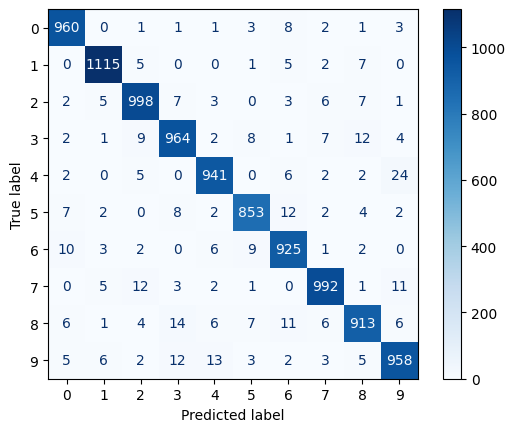

In [ ]:
conf_matr(y_test.to('cpu'),y_pred.to('cpu'),[0,1,2,3,4,5,6,7,8,9])

### Convolutional Neural Network (CNN)

In [11]:
X_train_cnn = X_train.reshape(-1,1,28,28)
X_test_cnn = X_test.reshape(-1,1,28,28)
train_dataset = TensorDataset(X_train_cnn, y_train)
test_dataset = TensorDataset(X_test_cnn, y_test)

In [12]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=False)
print(f'Number of batches\nTrain : {len(train_dataloader)}\nTest : {len(test_dataloader)}')
print(f'\nCheck data size\nTrain data :{next(iter(train_dataloader))[0].shape}\nlabels :{next(iter(train_dataloader))[1].shape}')

Number of batches
Train : 625
Test : 313

Check data size
Train data :torch.Size([32, 1, 28, 28])
labels :torch.Size([32])


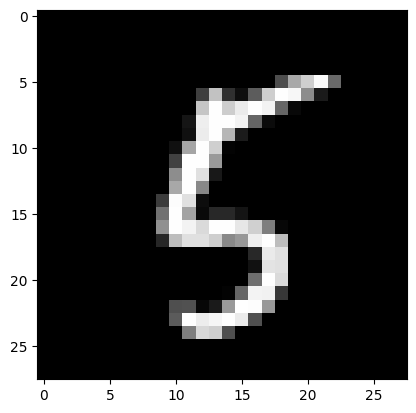

In [ ]:
# check image data
train_img = next(iter(train_dataloader))[0][0].to('cpu')
plt.imshow(train_img.squeeze(), cmap='gray')

In [13]:
class CNN(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*14*14, out_features=output_shape)
    )

  def forward(self, x):
    return self.layers(x)

cnn_model = CNN(input_shape=1,hidden_units=16,output_shape=10).to(device)

In [14]:
# Hyperparameter
epochs = 100
patience_param = 3
# loss function
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(cnn_model.parameters())
# Initial values
patience = patience_param
acc_before = 0
best_acc = 0
best_epoch = 0
best_param = 0

In [15]:
# Reset weight if needed to retrain the model
cnn_model.apply(weight_init)

CNN(
  (layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=3136, out_features=10, bias=True)
  )
)

In [16]:
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-------')
  # Train
  train_loss, train_acc = 0, 0
  cnn_model.train()
  for X, y in train_dataloader:
    y_pred = cnn_model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_score(y.to('cpu'),
                                y_pred.argmax(dim=1).to('cpu'))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # Calculate loss and accuracy per epoch
  train_loss /= len(train_dataloader)
  train_acc = (train_acc/len(train_dataloader)) * 100
  print(f'Train loss :{train_loss:.5f} Train acc : {train_acc:.2f}%')

  # Test
  test_loss, test_acc = 0, 0
  cnn_model.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = cnn_model(X)
      testing_loss = loss_fn(test_pred, y)
      test_loss += testing_loss
      test_acc += accuracy_score(y.to('cpu'),
                                test_pred.argmax(dim=1).to('cpu'))
    # Calculate loss and accuracy per epoch
    test_loss /= len(test_dataloader)
    test_acc = (test_acc/len(test_dataloader)) * 100
    print(f'Test loss :{test_loss:.5f} Test acc : {test_acc:.2f}% Patience : {patience}')

    # Updates the best model
    best_acc, best_param, best_epoch = get_best_model(test_acc, epoch, cnn_model, best_acc, best_param, best_epoch)

    # if test_acc declines, and patience run out, stop training
    stop_train_now, patience, acc_before = stop_train(patience, patience_param, test_acc, acc_before)
    if stop_train_now :
      print(f'Test accuracy went down.\nstopping training at epoch {epoch} with test acuracy of {test_acc}')
      break

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss :0.37385 Train acc : 88.97%
Test loss :0.15417 Test acc : 95.47% Patience : 3
Updates the best model, with test accuracy of 95.46725239616613 at epoch 0!
Epoch: 1
-------
Train loss :0.10806 Train acc : 96.75%
Test loss :0.09142 Test acc : 97.27% Patience : 3
Updates the best model, with test accuracy of 97.27436102236422 at epoch 1!
Epoch: 2
-------
Train loss :0.07025 Train acc : 97.86%
Test loss :0.07439 Test acc : 97.54% Patience : 3
Updates the best model, with test accuracy of 97.54392971246007 at epoch 2!
Epoch: 3
-------
Train loss :0.05234 Train acc : 98.35%
Test loss :0.06690 Test acc : 98.08% Patience : 3
Updates the best model, with test accuracy of 98.08306709265176 at epoch 3!
Epoch: 4
-------
Train loss :0.04004 Train acc : 98.67%
Test loss :0.06720 Test acc : 97.84% Patience : 3
Epoch: 5
-------
Train loss :0.03265 Train acc : 99.00%
Test loss :0.05471 Test acc : 98.27% Patience : 2
Updates the best model, with test accuracy of 98.27276357827

In [17]:
# Load the best model
cnn_model.load_state_dict(best_param)

<All keys matched successfully>

Accuracy : 0.9836983698369837
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1027
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999



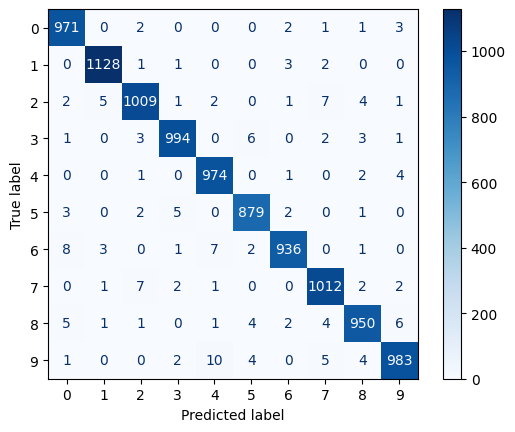

In [20]:
# Test the best model
cnn_model.eval()
with torch.inference_mode():
  y_pred = cnn_model(X_test_cnn)
  test_acc = accuracy_score(y_test.to('cpu'),
                              y_pred.argmax(dim=1).to('cpu'))
# classification report
print(f'Accuracy : {test_acc}')
print("Classification Report:\n", classification_report(y_test.to('cpu'), y_pred.argmax(dim=1).to('cpu')))

# confusion matrix
conf_matr(y_test.to('cpu'),y_pred.argmax(dim=1).to('cpu'),[0,1,2,3,4,5,6,7,8,9])

In [21]:
# Save model to drive
path = '/content/drive/MyDrive/Colab Notebooks/Digit Recognizer(MNIST)/model/'
model_name = f'digit_recognizer_acc_{test_acc}.pth'
model_path = path + model_name
torch.save(cnn_model.state_dict(),model_path)

# Predict from new samples

In [22]:
folders = [Path('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer(MNIST)/normal'),Path('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer(MNIST)/diff_pos'),Path('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer(MNIST)/thin')]
img_list = []
for folder in folders:
  files = folder.glob('*')
  for file in files:
    img = cv2.imread(str(file))
    img = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)
    img_list.append(img)
img_np = np.array(img_list)
print(f'img_np shape : {img_np.shape}')

img_np shape : (15, 28, 28, 3)


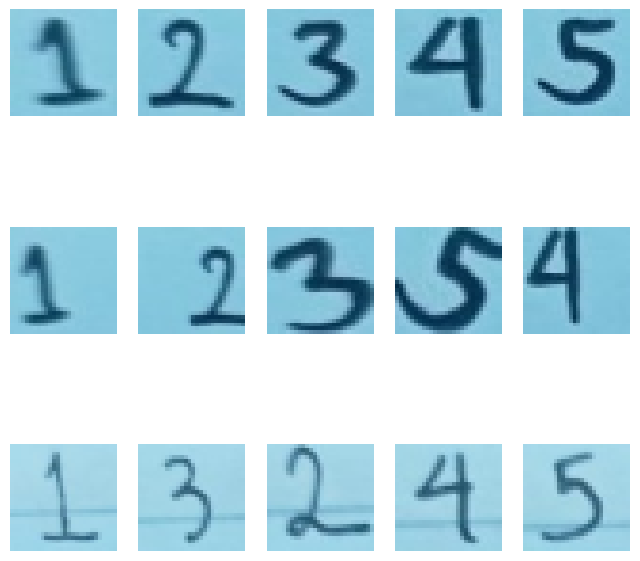

In [23]:
row = 3
col = 5
fig, axes = plt.subplots(row,col,figsize=(8,8))
axes = axes.flatten()
for i in range(row*col):
  image = img_np[i]
  axes[i].imshow(image)
  axes[i].axis('off')

In [24]:
imgs = []
for img in img_np :
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  (thresh, bw_img) = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
  imgs.append(bw_img)
imgs_processed = np.array(imgs)

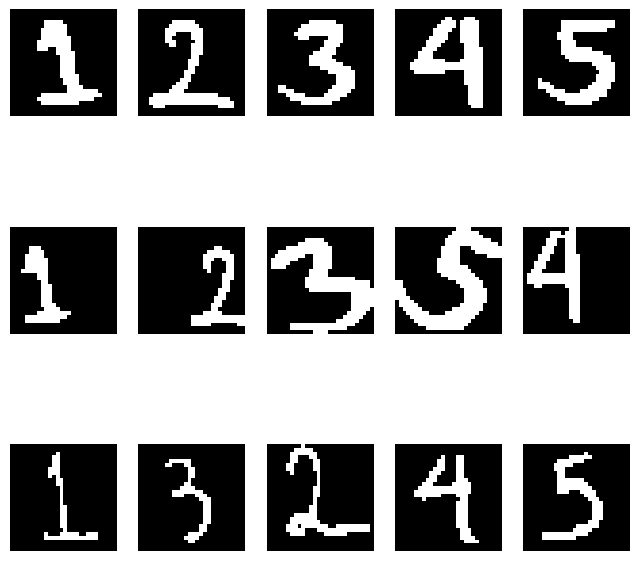

In [25]:
row = 3
col = 5
fig, axes = plt.subplots(row,col,figsize=(8,8))
axes = axes.flatten()
for i in range(row*col):
  image = imgs_processed[i]
  axes[i].imshow(image, cmap='gray')
  axes[i].axis('off')

In [26]:
# Normalize
imgs_processed = imgs_processed / 255.0
# Reshape
imgs_test = np.expand_dims(imgs_processed, axis=1)

In [27]:
# Convert to tensor, move to device
imgs_test = torch.from_numpy(imgs_test.astype(np.float32)).to(device)

In [28]:
# Predict the samples
cnn_model.eval()
with torch.inference_mode():
  y_pred = cnn_model(imgs_test).argmax(dim=1)

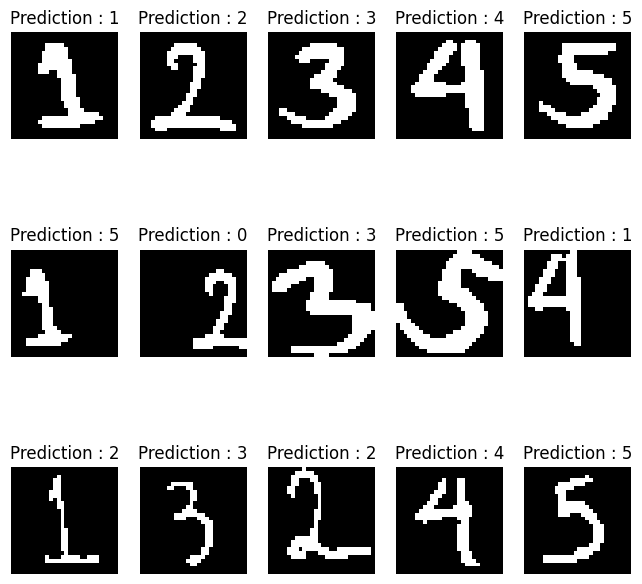

In [35]:
row = 3
col = 5
imgs_test = np.squeeze(imgs_test).to('cpu')
fig, axes = plt.subplots(row,col,figsize=(8,8))
axes = axes.flatten()
for i in range(row*col):
  image = imgs_test[i]
  title = y_pred[i]
  axes[i].imshow(image, cmap='gray')
  axes[i].set_title(f'Prediction : {title}')
  axes[i].axis('off')